## Import Raw Data

In [ ]:
import numpy as np
import pandas as pd
import math
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import random

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
AC_df=pd.read_csv('gdrive/My Drive/Colab Notebooks/LAMP/00_df_raw_AC.csv')
MC_df=pd.read_csv('gdrive/My Drive/Colab Notebooks/LAMP/00_df_raw_MC.csv')

In [ ]:
AC_df.head()

,Curve_ID,Channel,PrimerMix,Target,Assay,Conc,Exp_ID,1,2,3,...,26,27,28,29,30,31,32,33,34,35
0,0,panel31,5plex_A,ad,RM5,10000,20201202_01,1.047102,1.044508,1.040169,...,1.079054,1.080444,1.082378,1.084868,1.087228,1.088792,1.089030,1.089370,1.090364,1.091523
1,1,panel31,5plex_A,ad,RM5,10000,20201202_01,1.055056,1.044100,1.034911,...,1.077810,1.081243,1.085042,1.086968,1.088373,1.088361,1.088422,1.088637,1.090999,1.093670
2,2,panel31,5plex_A,ad,RM5,10000,20201202_01,1.025152,1.012527,1.000595,...,1.036369,1.038103,1.039515,1.041150,1.042766,1.044282,1.046117,1.046840,1.046953,1.047534
3,3,panel31,5plex_A,ad,RM5,10000,20201202_01,1.066100,1.055951,1.045311,...,1.061660,1.062129,1.063178,1.064482,1.065405,1.065576,1.065704,1.065845,1.066014,1.066355
4,4,panel31,5plex_A,ad,RM5,10000,20201202_01,1.067173,1.052578,1.038806,...,1.078364,1.078525,1.078718,1.078760,1.079006,1.080497,1.082366,1.084685,1.086773,1.087387


In [ ]:
AC

In [ ]:
save_df = pd.read_csv('gdrive/My Drive/Colab Notebooks/LAMP/output.csv')
save_df['group_ID'] = [i[:11] for i in save_df['group_ID']]
grouped = save_df.groupby('group_ID')
separated_dataframes = []

# Iterate over each group and create a separate DataFrame
for group_name, group_data in grouped:
    separated_dataframes.append(group_data)

# Access the separated DataFrames
first_dataframe = separated_dataframes[0]
second_dataframe = separated_dataframes[1]
third_dataframe = separated_dataframes[2]

In [ ]:
first_dataframe.shape

(2778, 107)

In [ ]:
third_dataframe.iloc[1:2]

,Unnamed: 0,group_ID,target,F_m,F_b,S_c,C_s,A_s,1,2,...,92,92.5,93,93.5,94,94.5,95,95.5,96,96.5
5687,5687,20210209_01,ad,1.093164,0.011192,0.271538,17.287508,3.146595,-0.002941,-0.003307,...,0.024465,0.003069,0.001326,0.00086,0.000822,0.00068,0.000588,0.000532,0.000451,0.000503


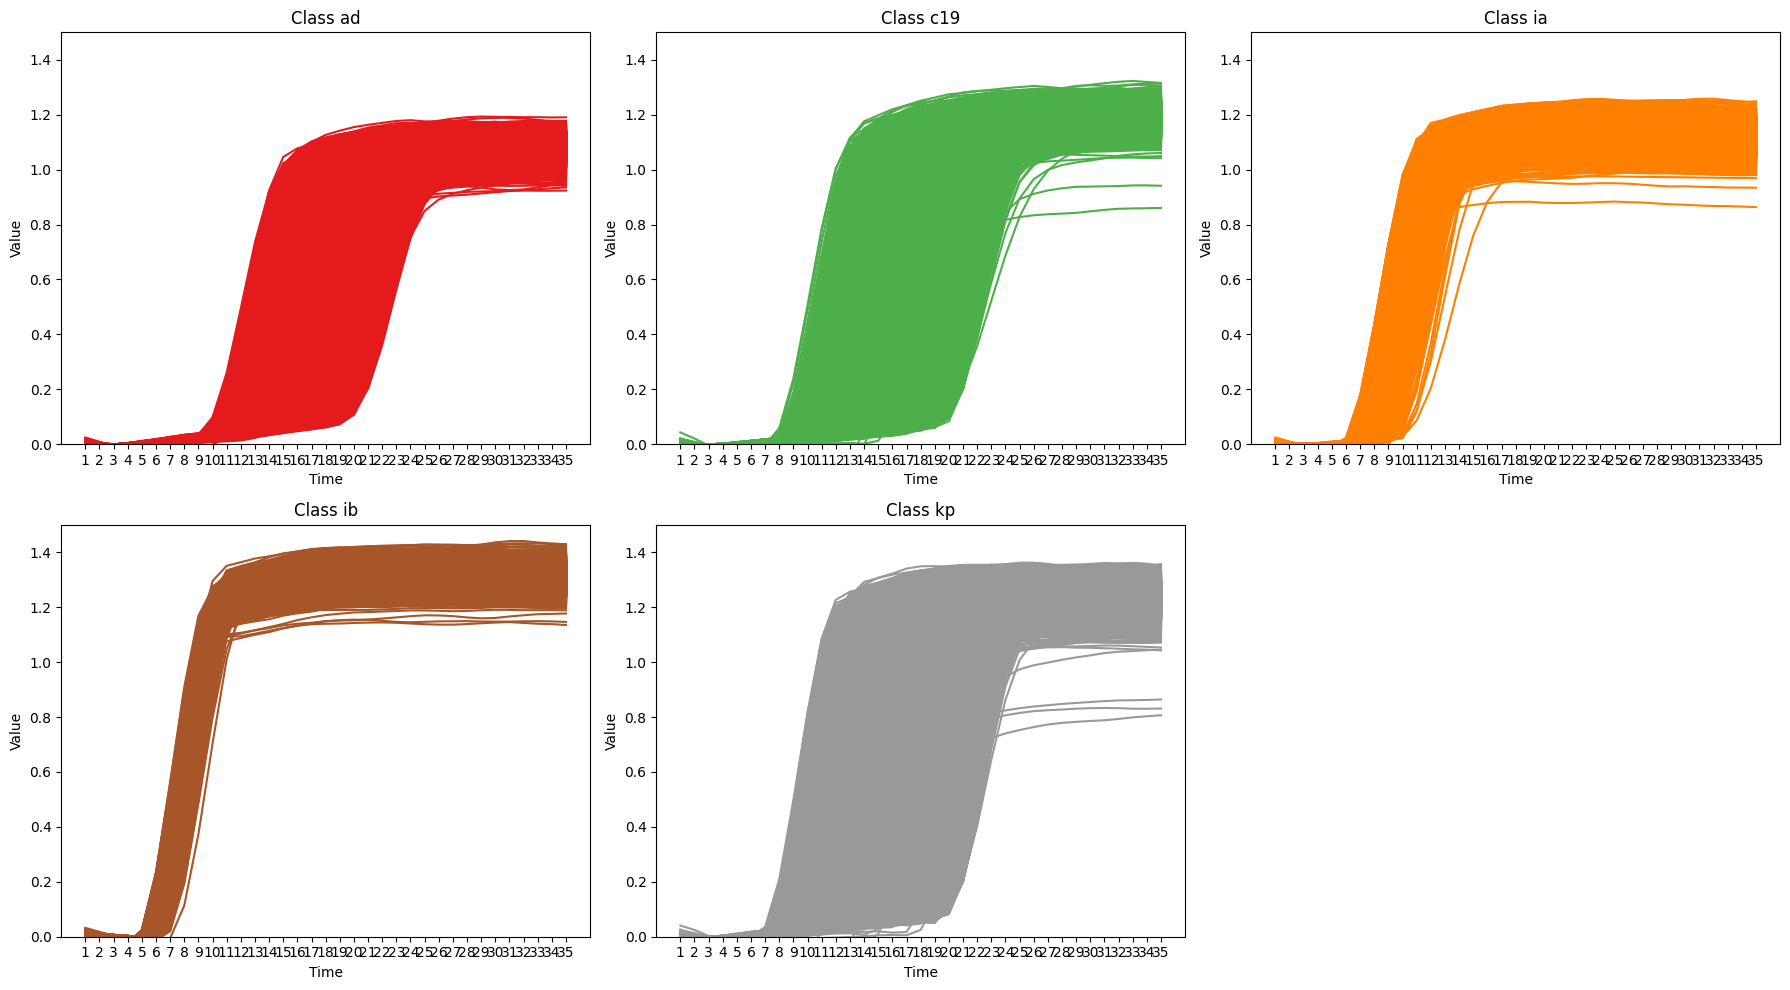

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe is named 'first_dataframe' with column 2 as the labels and columns 8 to 43 as the time series data
# Sort the dataframe by the label column
sorted_df = third_dataframe.sort_values(third_dataframe.columns[2])

# Get the unique labels
labels = sorted_df[third_dataframe.columns[2]].unique()

# Calculate the number of rows and columns for the grid
num_rows = 2
num_cols = 3
num_plots = num_rows * num_cols

# Set up the figure and axes for the grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18,10))
axs = axs.ravel()

# Define a color palette
color_palette = plt.cm.Set1(np.linspace(0, 1, len(labels)))

# Iterate over each label and color
for i, (label, color) in enumerate(zip(labels, color_palette)):
    # Filter the dataframe for the current label
    label_df = sorted_df[sorted_df[third_dataframe.columns[2]] == label]

    # Get the corresponding subplot
    ax = axs[i]

    # Iterate over each row in the filtered dataframe
    for index, row in label_df.iterrows():
        # Get the time series data
        time_series = row[third_dataframe.columns[8:43]]

        # Plot the time series with the defined color
        ax.plot(time_series, color=color)

    # Set labels and title for the subplot
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.set_title('Class {}'.format(label))

    ax.set_ylim([0, 1.5])

# Remove any empty subplots
for i in range(len(labels), num_plots):
    fig.delaxes(axs[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Sort by Target, only keep Curve_ID and AC curve values

1.   List item
2.   List item



In [ ]:
ad_df = AC_df.loc[AC_df['Target'] == 'ad']
ia_df = AC_df.loc[AC_df['Target'] == 'ia']
ib_df = AC_df.loc[AC_df['Target'] == 'ib']
kp_df = AC_df.loc[AC_df['Target'] == 'kp']
c19_df = AC_df.loc[AC_df['Target'] == 'c19']
ntc_df = AC_df.loc[AC_df['Target'] == 'ntc']

ad_only = ad_df[["Curve_ID", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35"]].T
ia_only = ia_df[["Curve_ID", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35"]].T
ib_only = ib_df[["Curve_ID", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35"]].T
kp_only = kp_df[["Curve_ID", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35"]].T
c19_only = c19_df[["Curve_ID", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35"]].T
ntc_only = ntc_df[["Curve_ID", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35"]].T

In [ ]:
new_header = ad_only.iloc[0] #grab the first row for the header
ad_only = ad_only[1:] #take the data less the header row
ad_only.columns = new_header #set the header row as the df header

new_header = ia_only.iloc[0] #grab the first row for the header
ia_only = ia_only[1:] #take the data less the header row
ia_only.columns = new_header #set the header row as the df header

new_header = ib_only.iloc[0] #grab the first row for the header
ib_only = ib_only[1:] #take the data less the header row
ib_only.columns = new_header #set the header row as the df header

new_header = kp_only.iloc[0] #grab the first row for the header
kp_only = kp_only[1:] #take the data less the header row
kp_only.columns = new_header #set the header row as the df header

new_header = c19_only.iloc[0] #grab the first row for the header
c19_only = c19_only[1:] #take the data less the header row
c19_only.columns = new_header #set the header row as the df header

new_header = ntc_only.iloc[0] #grab the first row for the header
ntc_only = ntc_only[1:] #take the data less the header row
ntc_only.columns = new_header #set the header row as the df header

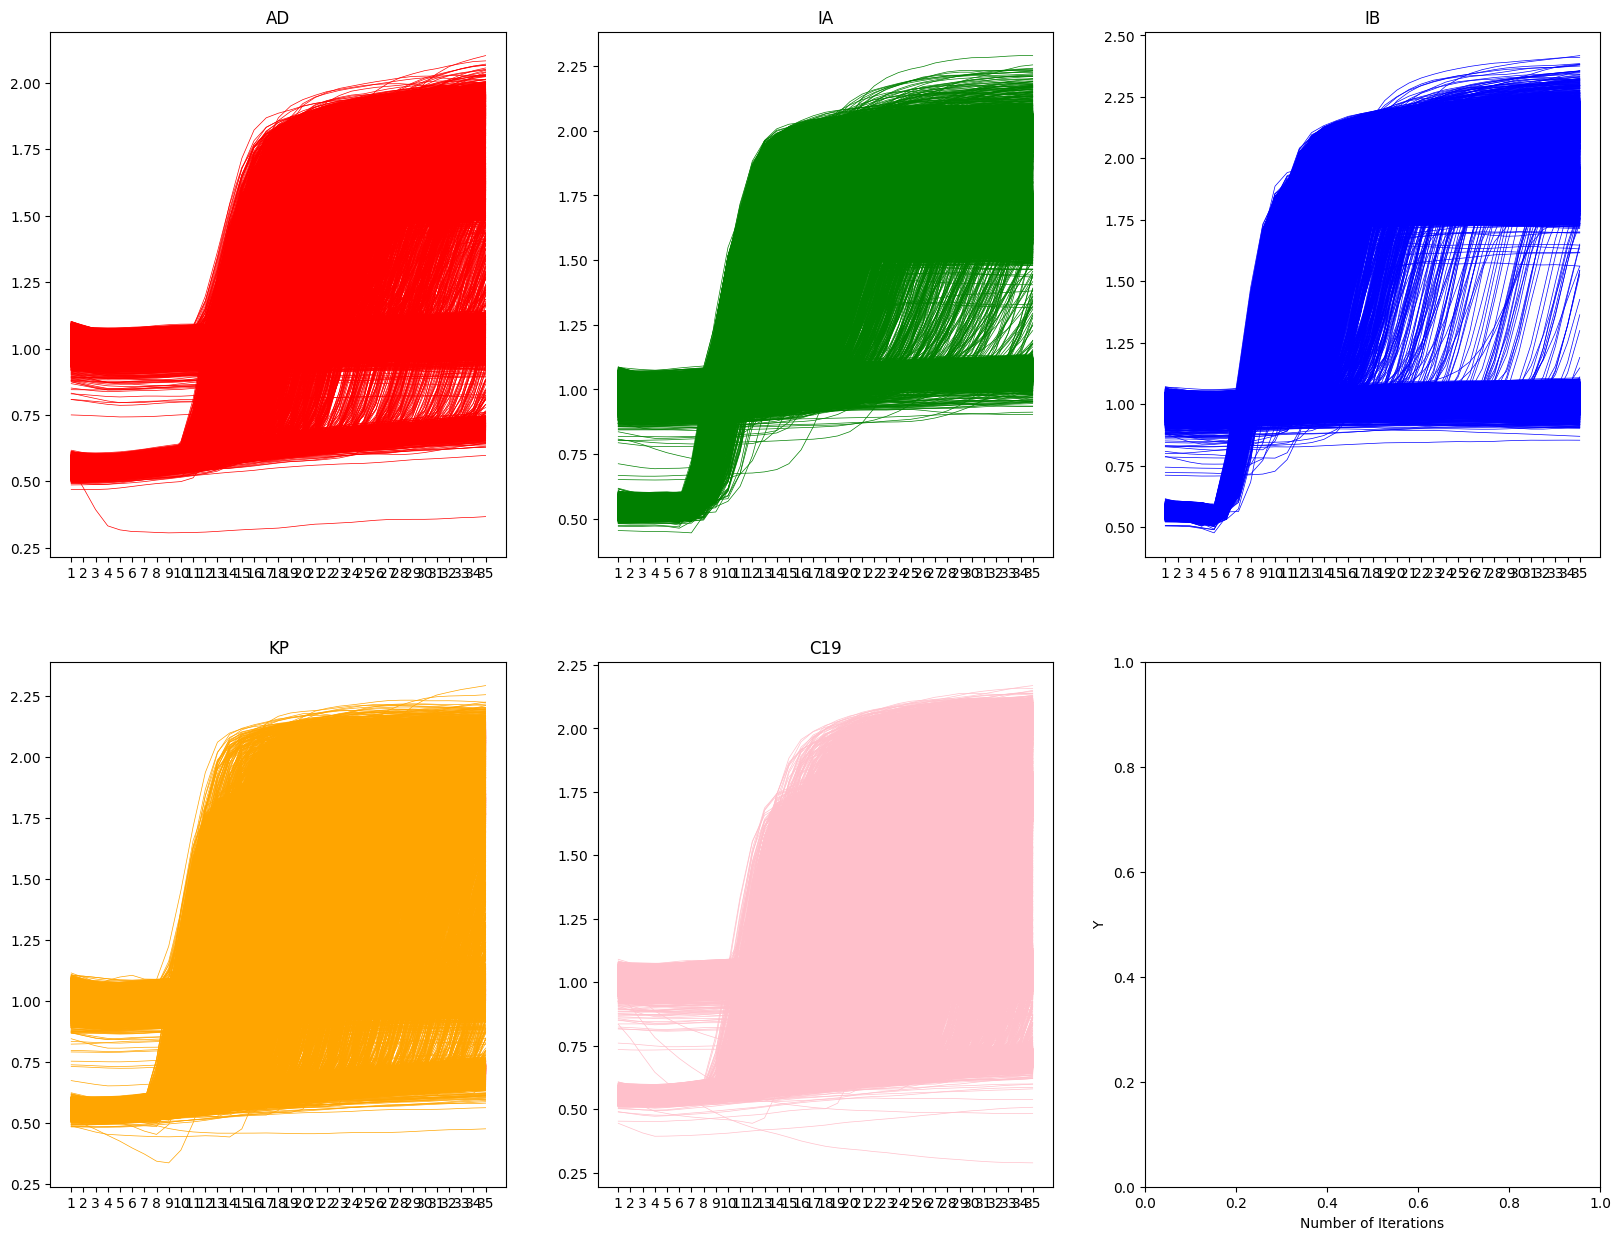

In [ ]:
f, axs = plt.subplots(2,3)

#set axis label
plt.xlabel('Number of Iterations')
plt.ylabel('Y')

#set figure size
f.set_figwidth(20)
f.set_figheight(15)

#for all values use line below
axs[0, 0].set_title('AD')
for i in ad_only.columns:
  axs[0,0].plot(ad_only[i],color='red', linewidth=0.5)

#for all values use line below
axs[0, 1].set_title('IA')
for i in ia_only.columns:
  axs[0, 1].plot(ia_only[i],color='green', linewidth=0.5)

#for all values use line below
axs[0, 2].set_title('IB')
for i in ib_only.columns:
  axs[0, 2].plot(ib_only[i],color='blue', linewidth=0.5)

#for all values use line below
axs[1, 0].set_title('KP')
for i in kp_only.columns:
  axs[1, 0].plot(kp_only[i],color='orange', linewidth=0.5)

#for all values use line below
axs[1, 1].set_title('C19')
for i in c19_only.columns:
  axs[1, 1].plot(c19_only[i],color='pink', linewidth=0.5)

# #for all values use line below
# axs[1, 2].set_title('NTC')
# for i in ntc_only.columns:
#   axs[1, 2].plot(ntc_only[i])

plt.show()

In [ ]:
ad_melt = MC_df.loc[AC_df['Target'] == 'ad']
ia_melt = MC_df.loc[AC_df['Target'] == 'ia']
ib_melt = MC_df.loc[AC_df['Target'] == 'ib']
kp_melt = MC_df.loc[AC_df['Target'] == 'kp']
c19_melt = MC_df.loc[AC_df['Target'] == 'c19']
ntc_melt = MC_df.loc[AC_df['Target'] == 'ntc']

ad_melt_only =  pd.concat([ad_melt.loc[:, "Curve_ID"], ad_melt.loc[:, "65":"96.5"]], axis=1).T
ia_melt_only =  pd.concat([ia_melt.loc[:, "Curve_ID"], ia_melt.loc[:, "65":"96.5"]], axis=1).T
ib_melt_only =  pd.concat([ib_melt.loc[:, "Curve_ID"], ib_melt.loc[:, "65":"96.5"]], axis=1).T
kp_melt_only =  pd.concat([kp_melt.loc[:, "Curve_ID"], kp_melt.loc[:, "65":"96.5"]], axis=1).T
c19_melt_only =  pd.concat([c19_melt.loc[:, "Curve_ID"], c19_melt.loc[:, "65":"96.5"]], axis=1).T
ntc_melt_only =  pd.concat([ntc_melt.loc[:, "Curve_ID"], ntc_melt.loc[:, "65":"96.5"]], axis=1).T

In [ ]:
new_header = ad_melt_only.iloc[0] #grab the first row for the header
ad_melt_only = ad_melt_only[1:] #take the data less the header row
ad_melt_only.columns = new_header #set the header row as the df header

new_header = ia_melt_only.iloc[0] #grab the first row for the header
ia_melt_only = ia_melt_only[1:] #take the data less the header row
ia_melt_only.columns = new_header #set the header row as the df header

new_header = ib_melt_only.iloc[0] #grab the first row for the header
ib_melt_only = ib_melt_only[1:] #take the data less the header row
ib_melt_only.columns = new_header #set the header row as the df header

new_header = kp_melt_only.iloc[0] #grab the first row for the header
kp_melt_only = kp_melt_only[1:] #take the data less the header row
kp_melt_only.columns = new_header #set the header row as the df header

new_header = c19_melt_only.iloc[0] #grab the first row for the header
c19_melt_only = c19_melt_only[1:] #take the data less the header row
c19_melt_only.columns = new_header #set the header row as the df header

new_header = ntc_melt_only.iloc[0] #grab the first row for the header
ntc_melt_only = ntc_melt_only[1:] #take the data less the header row
ntc_melt_only.columns = new_header #set the header row as the df header

## Preprocessing

In [ ]:
#filter data by removing max ntc at cycle 20
thresh = 0.2
cycle_thresh = 20

for i in ad_only.columns:
  avg = sum(ad_only[i][0:5])/5
  ad_only[i] = ad_only[i] - avg
  if ad_only[i][cycle_thresh] < thresh:
    ad_only = ad_only.drop(columns = i)

for i in ia_only.columns:
  avg = sum(ia_only[i][0:5])/5
  ia_only[i] = ia_only[i] - avg
  if ia_only[i][cycle_thresh] < thresh:
    ia_only = ia_only.drop(columns = i)

for i in ib_only.columns:
  avg = sum(ib_only[i][0:5])/5
  ib_only[i] = ib_only[i] - avg
  if ib_only[i][cycle_thresh] < thresh:
    ib_only = ib_only.drop(columns = i)

for i in kp_only.columns:
  avg = sum(kp_only[i][0:5])/5
  kp_only[i] = kp_only[i] - avg
  if kp_only[i][cycle_thresh] < thresh:
    kp_only = kp_only.drop(columns = i)

for i in c19_only.columns:
  avg = sum(c19_only[i][0:5])/5
  c19_only[i] = c19_only[i] - avg
  if c19_only[i][cycle_thresh] < thresh:
    c19_only = c19_only.drop(columns = i)

for i in ntc_only.columns:
  avg = sum(ntc_only[i][0:5])/5
  ntc_only[i] = ntc_only[i] - avg


In [ ]:
ad_melt_only = ad_melt_only[list(ad_only.columns.values)]
ia_m_only = ia_m_only[list(ia_only.columns.values)]
ib_m_only = ib_m_only[list(ib_only.columns.values)]
kp_m_only = kp_m_only[list(kp_only.columns.values)]
c19_m_only = c19_m_only[list(c19_only.columns.values)]
ntc_m_only = ntc_m_only[list(ntc_only.columns.values)]

In [ ]:
all_melt = np.vstack((ad_melt_only.T.to_numpy(),ia_m_only.T.to_numpy(),ib_m_only.T.to_numpy(),kp_m_only.T.to_numpy(),c19_m_only.T.to_numpy()))

In [ ]:
#header array
headers = ["" for x in range(ad_only.shape[1]+ia_only.shape[1]+ib_only.shape[1]+kp_only.shape[1]+c19_only.shape[1])]
i = 0
for col in ad_only.columns:
  exp = ad_df.loc[ad_df['Curve_ID'] == col]["Exp_ID"]
  channel = ad_df.loc[ad_df['Curve_ID'] == col]["Channel"]
  headers[i]=exp+channel
  i+=1
for col in ia_only.columns:
  exp = ia_df.loc[ia_df['Curve_ID'] == col]["Exp_ID"]
  channel = ia_df.loc[ia_df['Curve_ID'] == col]["Channel"]
  headers[i]=exp+channel
  i+=1
for col in ib_only.columns:
  exp = ib_df.loc[ib_df['Curve_ID'] == col]["Exp_ID"]
  channel = ib_df.loc[ib_df['Curve_ID'] == col]["Channel"]
  headers[i]=exp+channel
  i+=1
for col in kp_only.columns:
  exp = kp_df.loc[kp_df['Curve_ID'] == col]["Exp_ID"]
  channel = kp_df.loc[kp_df['Curve_ID'] == col]["Channel"]
  headers[i]=exp+channel
  i+=1
for col in c19_only.columns:
  exp = c19_df.loc[c19_df['Curve_ID'] == col]["Exp_ID"]
  channel = c19_df.loc[c19_df['Curve_ID'] == col]["Channel"]
  headers[i]=exp+channel
  i+=1
headers = np.asarray(headers)

In [ ]:
#processed curve array
all_curves = np.vstack((ad_only.T.to_numpy(),ia_only.T.to_numpy(),ib_only.T.to_numpy(),kp_only.T.to_numpy(),c19_only.T.to_numpy(),))

#Fitting

In [ ]:
def sigmoid_func(t, F_m, F_b, S_c, C_s, A_s):
    return F_m/(1+np.power( np.exp(-S_c*(t-C_s)) , A_s))+F_b
  #A_s never goes below 1 usually, upper bound is difficult

In [ ]:
target_list = [ad_only, ia_only, ib_only, kp_only, c19_only]
all_data = np.zeros((ad_only.shape[1]+ia_only.shape[1]+ib_only.shape[1]+kp_only.shape[1]+c19_only.shape[1],5))

j = 0
for targets in target_list: #target_list = [ad_only, ia_only, ib_only, kp_only, c19_only]
  num_samples = targets.shape[1]
  rand_samp = random.sample(targets.columns.values.tolist(),num_samples)
  #F_m, F_b, S_c, C_s, A_s
  #popt = np.zeros((num_samples,5))
  for i in rand_samp:
    all_data[j], pcov = curve_fit(sigmoid_func, range(1, 36), targets[i], p0=[1,0,0.2,15,1], bounds = ([0,-0.2,0,0,0],[2,0.2,0.5,35,10]))
    j = j + 1

In [ ]:
class_name_1 = np.full((ad_only.shape[1]),'ad')
class_name_2 = np.full((ia_only.shape[1]),'ia')
class_name_3 = np.full((ib_only.shape[1]),'ib')
class_name_4 = np.full((kp_only.shape[1]),'kp')
class_name_5 = np.full((c19_only.shape[1]),'c19')

In [ ]:
class_all = np.concatenate((class_name_1,class_name_2,class_name_3,class_name_4,class_name_5)).T

In [ ]:
model_input = np.vstack((class_all, all_data.T)).T

In [ ]:
num_samples = c19_only.shape[1]

rand_samp = random.sample(c19_only.columns.values.tolist(),num_samples)
j = 0
popt = np.zeros((num_samples,5))
mse = np.zeros(num_samples)
popt1 = np.zeros(5)
popt2 = np.zeros(5)
popt3 = np.zeros(5)
for i in rand_samp:
  popt[j], pcov = curve_fit(sigmoid_func, range(1, 36), c19_only[i], p0=[1,0,0.2,15,1], bounds = ([0,-0.2,0,0,0],[2,0.2,0.5,35,10]))
  if (AC_df.loc[AC_df['Curve_ID'] == i].Exp_ID == '20201202_01')[i]:
    popt1 = np.c_[popt1, popt[j]]
  elif (AC_df.loc[AC_df['Curve_ID'] == i].Exp_ID == '20210201_01')[i]:
    popt2 = np.c_[popt2, popt[j]]
  elif (AC_df.loc[AC_df['Curve_ID'] == i].Exp_ID == '20210209_01')[i]:
    popt3 = np.c_[popt3, popt[j]]
  mse[j] =  np.mean(np.power((c19_only[i]-sigmoid_func(range(1, 36), *popt[j])),2))
  j = j + 1

popt1 = popt1.T[1:]
popt2 = popt2.T[1:]
popt3 = popt3.T[1:]
num_bins = 30

In [ ]:
f, axs = plt.subplots(3,3)
#set figure size
f.set_figwidth(20)
f.set_figheight(20)

axs[0,0].set_title('F_m')
axs[0,0].hist(popt1.T[0], bins=num_bins,color='green')
axs[0,0].set_title('F_m')
axs[0,0].hist(popt2.T[0], bins=num_bins,color='red')
axs[0,0].set_title('F_m')
axs[0,0].hist(popt3.T[0], bins=num_bins,color='blue')
axs[1,0].set_title('S_c')
axs[1,0].hist(popt1.T[2], bins=num_bins,color='green')
axs[1,0].set_title('S_c')
axs[1,0].hist(popt2.T[2], bins=num_bins,color='red')
axs[1,0].set_title('S_c')
axs[1,0].hist(popt3.T[2], bins=num_bins,color='blue')
axs[2,0].set_title('A_s')
axs[2,0].hist(popt1.T[4], bins=num_bins,color='green')
axs[2,0].set_title('A_s')
axs[2,0].hist(popt2.T[4], bins=num_bins,color='red')
axs[2,0].set_title('A_s')
axs[2,0].hist(popt3.T[4], bins=num_bins,color='blue')

(array([203., 660., 849., 826., 651., 474., 310., 195., 120.,  58.,  45.,
         22.,   5.,   5.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([4.60892164e-05, 7.91595181e-05, 1.12229820e-04, 1.45300121e-04,
        1.78370423e-04, 2.11440725e-04, 2.44511026e-04, 2.77581328e-04,
        3.10651630e-04, 3.43721931e-04, 3.76792233e-04, 4.09862535e-04,
        4.42932836e-04, 4.76003138e-04, 5.09073440e-04, 5.42143741e-04,
        5.75214043e-04, 6.08284344e-04, 6.41354646e-04, 6.74424948e-04,
        7.07495249e-04, 7.40565551e-04, 7.73635853e-04, 8.06706154e-04,
        8.39776456e-04, 8.72846758e-04, 9.05917059e-04, 9.38987361e-04,
        9.72057663e-04, 1.00512796e-03, 1.03819827e-03]),
 <a list of 30 Patch objects>)

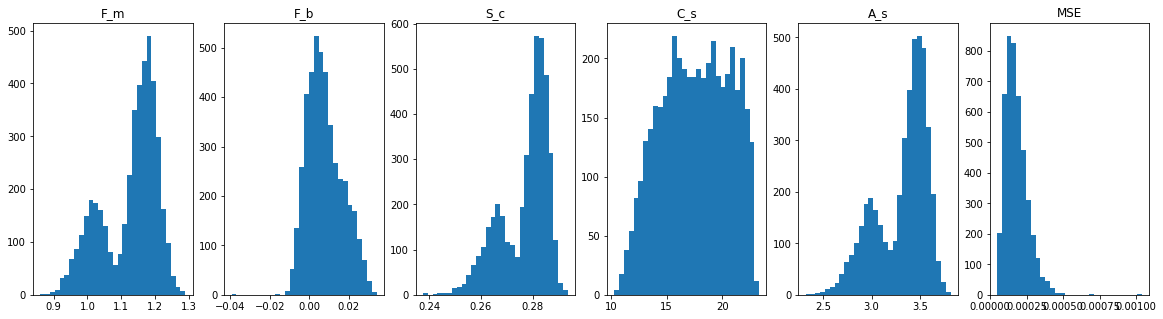

In [ ]:
num_samples = c19_only.shape[1]

f, axs = plt.subplots(1,6)


#set figure size
f.set_figwidth(20)
f.set_figheight(5)

rand_samp = random.sample(c19_only.columns.values.tolist(),num_samples)
j = 0
popt = np.zeros((num_samples,5))
mse = np.zeros(num_samples)
for i in rand_samp:
  popt[j], pcov = curve_fit(sigmoid_func, range(1, 36), c19_only[i], p0=[1,0,0.2,15,1], bounds = ([0,-0.2,0,0,0],[2,0.2,0.5,35,10]))
  mse[j] =  np.mean(np.power((c19_only[i]-sigmoid_func(range(1, 36), *popt[j])),2))
  j = j + 1

num_bins = 30

axs[0].set_title('F_m')
axs[0].hist(popt.T[0], bins=num_bins)
axs[1].set_title('F_b')
axs[1].hist(popt.T[1], bins=num_bins)
axs[2].set_title('S_c')
axs[2].hist(popt.T[2], bins=num_bins)
axs[3].set_title('C_s')
axs[3].hist(popt.T[3], bins=num_bins)
axs[4].set_title('A_s')
axs[4].hist(popt.T[4], bins=num_bins)
axs[5].set_title('MSE')
axs[5].hist(mse, bins=num_bins)

(array([2.739e+03, 5.100e+03, 2.869e+03, 1.938e+03, 8.570e+02, 2.630e+02,
        6.600e+01, 1.100e+01, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.33339311e-05, 9.70508348e-05, 1.50767738e-04, 2.04484642e-04,
        2.58201546e-04, 3.11918450e-04, 3.65635353e-04, 4.19352257e-04,
        4.73069161e-04, 5.26786065e-04, 5.80502968e-04, 6.34219872e-04,
        6.87936776e-04, 7.41653679e-04, 7.95370583e-04, 8.49087487e-04,
        9.02804391e-04, 9.56521294e-04, 1.01023820e-03, 1.06395510e-03,
        1.11767201e-03, 1.17138891e-03, 1.22510581e-03, 1.27882272e-03,
        1.33253962e-03, 1.38625652e-03, 1.43997343e-03, 1.49369033e-03,
        1.54740724e-03, 1.60112414e-03, 1.65484104e-03]),
 <a list of 30 Patch objects>)

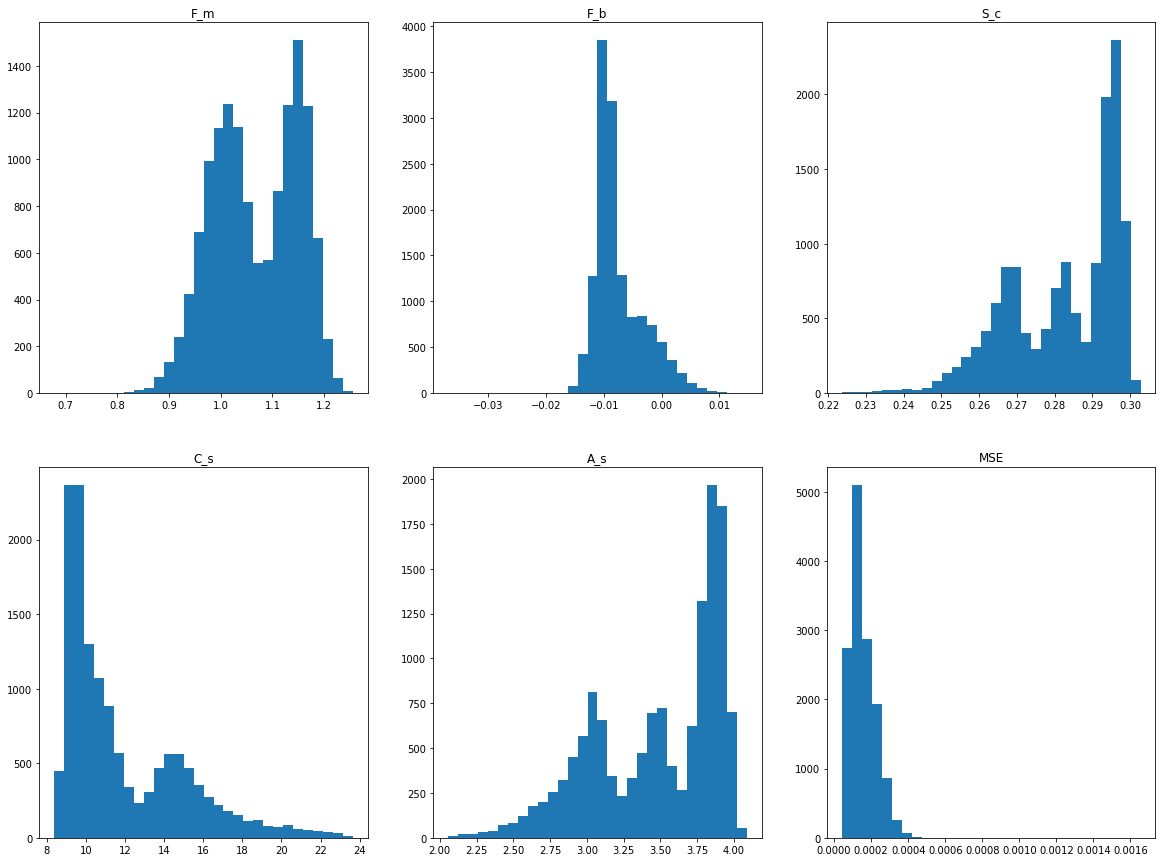

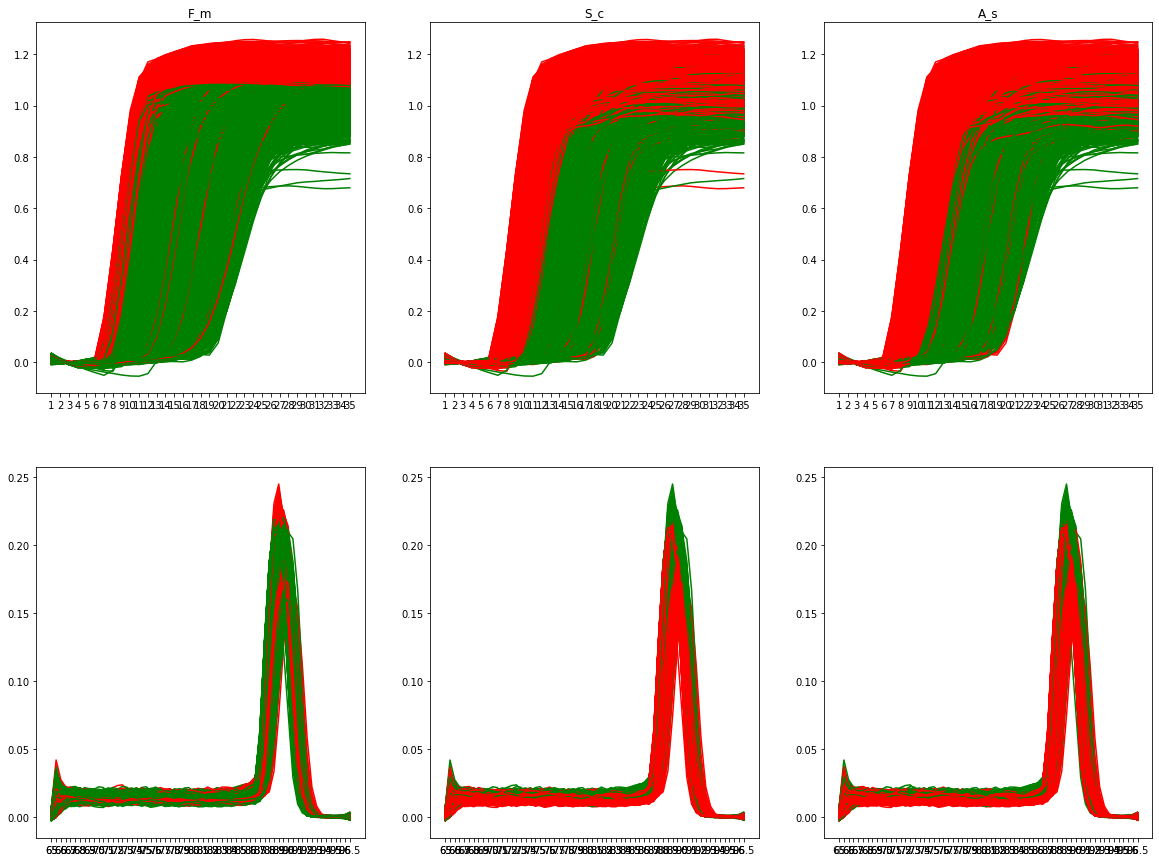

In [ ]:
target_list = [ad_only, ia_only, ib_only, kp_only, c19_only]
target_melt_list = [ad_melt_only,ia_melt_only,ib_melt_only,kp_melt_only,c19_melt_only]
target_num = 1

num_samples = target_list[target_num].shape[1]

f, axs = plt.subplots(2,3)
f1, axs1 = plt.subplots(2,3)
axs1[0,0].set_title('F_m')
axs1[0,1].set_title('S_c')
axs1[0,2].set_title('A_s')

fm_thresh = 1.09
sc_thresh = 0.275
as_thresh = 3.15

#set figure size
f.set_figwidth(20)
f.set_figheight(15)

f1.set_figwidth(20)
f1.set_figheight(15)

rand_samp = random.sample(target_list[target_num].columns.values.tolist(),num_samples)
j = 0
#F_m, F_b, S_c, C_s, A_s
popt = np.zeros((num_samples,5))
mse = np.zeros(num_samples)
for i in rand_samp:
  popt[j], pcov = curve_fit(sigmoid_func, range(1, 36), target_list[target_num][i], p0=[1,0,0.2,15,1], bounds = ([0,-0.2,0,0,0],[2,0.2,0.5,35,10]))
  if popt[j][0] < fm_thresh:
    axs1[0,0].plot(target_list[target_num][i],color='green')
    axs1[1,0].plot(target_melt_list[target_num][i],color='green')
  else:
    axs1[0,0].plot(target_list[target_num][i],color='red')
    axs1[1,0].plot(target_melt_list[target_num][i],color='red')
  if popt[j][2] < sc_thresh:
    axs1[0,1].plot(target_list[target_num][i],color='green')
    axs1[1,1].plot(target_melt_list[target_num][i],color='green')
  else:
    axs1[0,1].plot(target_list[target_num][i],color='red')
    axs1[1,1].plot(target_melt_list[target_num][i],color='red')
  if popt[j][4] < as_thresh:
    axs1[0,2].plot(target_list[target_num][i],color='green')
    axs1[1,2].plot(target_melt_list[target_num][i],color='green')
  else:
    axs1[0,2].plot(target_list[target_num][i],color='red')
    axs1[1,2].plot(target_melt_list[target_num][i],color='red')

  mse[j] =  np.mean(np.power((target_list[target_num][i]-sigmoid_func(range(1, 36), *popt[j])),2))
  j = j + 1

num_bins = 30

axs[0,0].set_title('F_m')
axs[0,0].hist(popt.T[0], bins=num_bins)
axs[0,1].set_title('F_b')
axs[0,1].hist(popt.T[1], bins=num_bins)
axs[0,2].set_title('S_c')
axs[0,2].hist(popt.T[2], bins=num_bins)
axs[1,0].set_title('C_s')
axs[1,0].hist(popt.T[3], bins=num_bins)
axs[1,1].set_title('A_s')
axs[1,1].hist(popt.T[4], bins=num_bins)
axs[1,2].set_title('MSE')
axs[1,2].hist(mse, bins=num_bins)

## Normalize all data w.r.t. 20210209_01


In [ ]:
target_list = [ad_only, ia_only, ib_only, kp_only, c19_only]
target_melt_list = [ad_melt_only,ia_melt_only,ib_melt_only,kp_melt_only,c19_melt_only]


j = 0
popt = np.zeros((num_samples,5))
mse = np.zeros(num_samples)
popt1 = np.zeros(5)
popt2 = np.zeros(5)
popt3 = np.zeros(5)
for i in target_list[4].columns.values.tolist():
  popt[j], pcov = curve_fit(sigmoid_func, range(1, 36), c19_only[i], p0=[1,0,0.2,15,1], bounds = ([0,-0.2,0,0,0],[2,0.2,0.5,35,10]))
  if (AC_df.loc[AC_df['Curve_ID'] == i].Exp_ID == '20201202_01')[i]:
    popt1 = np.c_[popt1, popt[j]]
  elif (AC_df.loc[AC_df['Curve_ID'] == i].Exp_ID == '20210201_01')[i]:
    popt2 = np.c_[popt2, popt[j]]
  elif (AC_df.loc[AC_df['Curve_ID'] == i].Exp_ID == '20210209_01')[i]:
    popt3 = np.c_[popt3, popt[j]]
  mse[j] =  np.mean(np.power((c19_only[i]-sigmoid_func(range(1, 36), *popt[j])),2))
  j = j + 1

popt1 = popt1.T[1:]
popt2 = popt2.T[1:]
popt3 = popt3.T[1:]
num_bins = 30

## Check if histogram is normal w/ normalisation test

##Parallel Processing

In [ ]:
import multiprocessing

print("Number of cpu : ", multiprocessing.cpu_count())


Number of cpu :  2


In [ ]:
from multiprocessing import Pool

import time

work = (["A", 5], ["B", 2], ["C", 1], ["D", 3])


def work_log(work_data):
    print(" Process %s waiting %s seconds" % (work_data[0], work_data[1]))
    time.sleep(int(work_data[1]))
    print(" Process %s Finished." % work_data[0])


def pool_handler():
    p = Pool(2)
    p.map(work_log, work)


if __name__ == '__main__':
    pool_handler()

 Process A waiting 5 seconds Process B waiting 2 seconds

 Process B Finished.
 Process C waiting 1 seconds
 Process C Finished.
 Process D waiting 3 seconds
 Process A Finished.
 Process D Finished.


## End Product

In [ ]:
target_list = [ad_only, ia_only, ib_only, kp_only, c19_only]

In [ ]:
ntc_only.shape[1]

6930

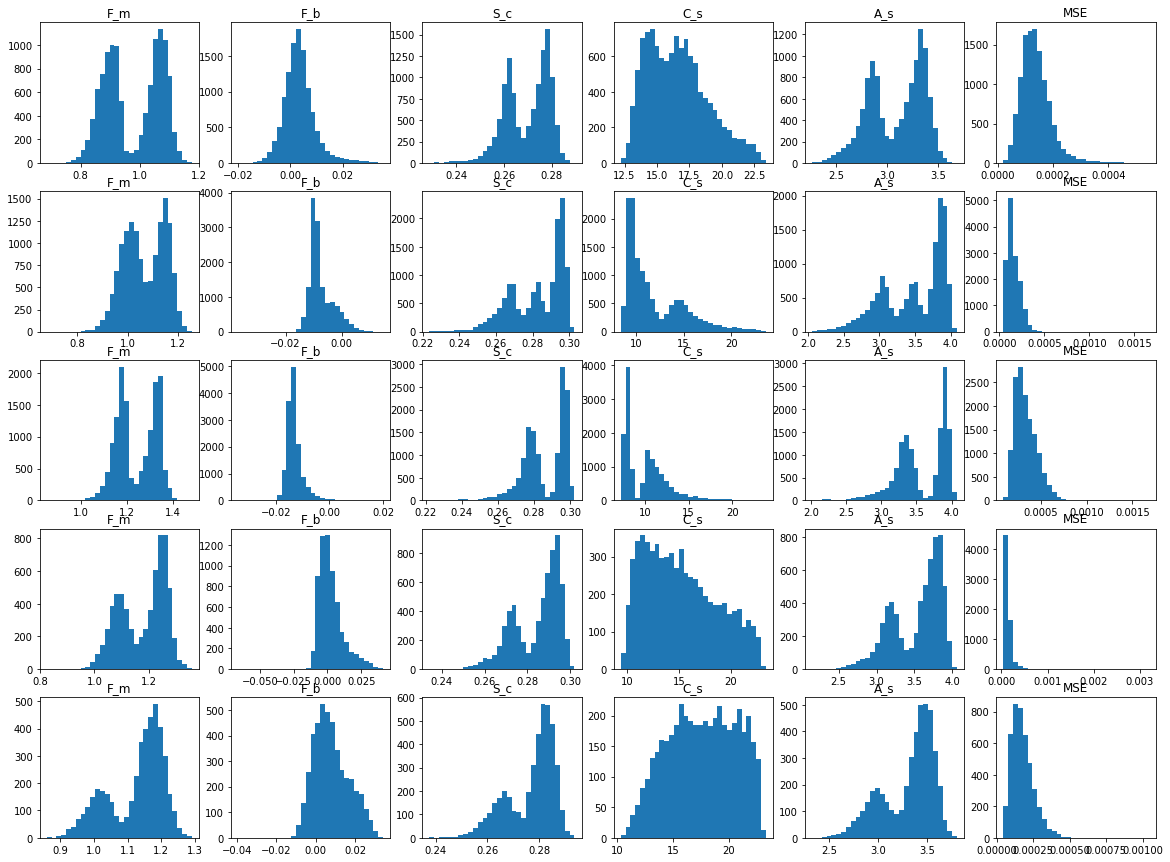

In [ ]:
f, axs = plt.subplots(5,6)

#set figure size
f.set_figwidth(20)
f.set_figheight(15)
n = 0
for targets in target_list:
  num_samples = targets.shape[1]
  rand_samp = random.sample(targets.columns.values.tolist(),num_samples)
  j = 0
  #F_m, F_b, S_c, C_s, A_s
  popt = np.zeros((num_samples,5))
  mse = np.zeros(num_samples)
  for i in rand_samp:
    popt[j], pcov = curve_fit(sigmoid_func, range(1, 36), targets[i], p0=[1,0,0.2,15,1], bounds = ([0,-0.2,0,0,0],[2,0.2,0.5,35,10]))
    mse[j] =  np.mean(np.power((targets[i]-sigmoid_func(range(1, 36), *popt[j])),2))
    j = j + 1

  num_bins = 30

  axs[n, 0].set_title('F_m')
  axs[n, 0].hist(popt.T[0], bins=num_bins)
  axs[n, 1].set_title('F_b')
  axs[n, 1].hist(popt.T[1], bins=num_bins)
  axs[n, 2].set_title('S_c')
  axs[n, 2].hist(popt.T[2], bins=num_bins)
  axs[n, 3].set_title('C_s')
  axs[n, 3].hist(popt.T[3], bins=num_bins)
  axs[n, 4].set_title('A_s')
  axs[n, 4].hist(popt.T[4], bins=num_bins)
  axs[n, 5].set_title('MSE')
  axs[n, 5].hist(mse, bins=num_bins)

  n = n+1

## Plotting Data

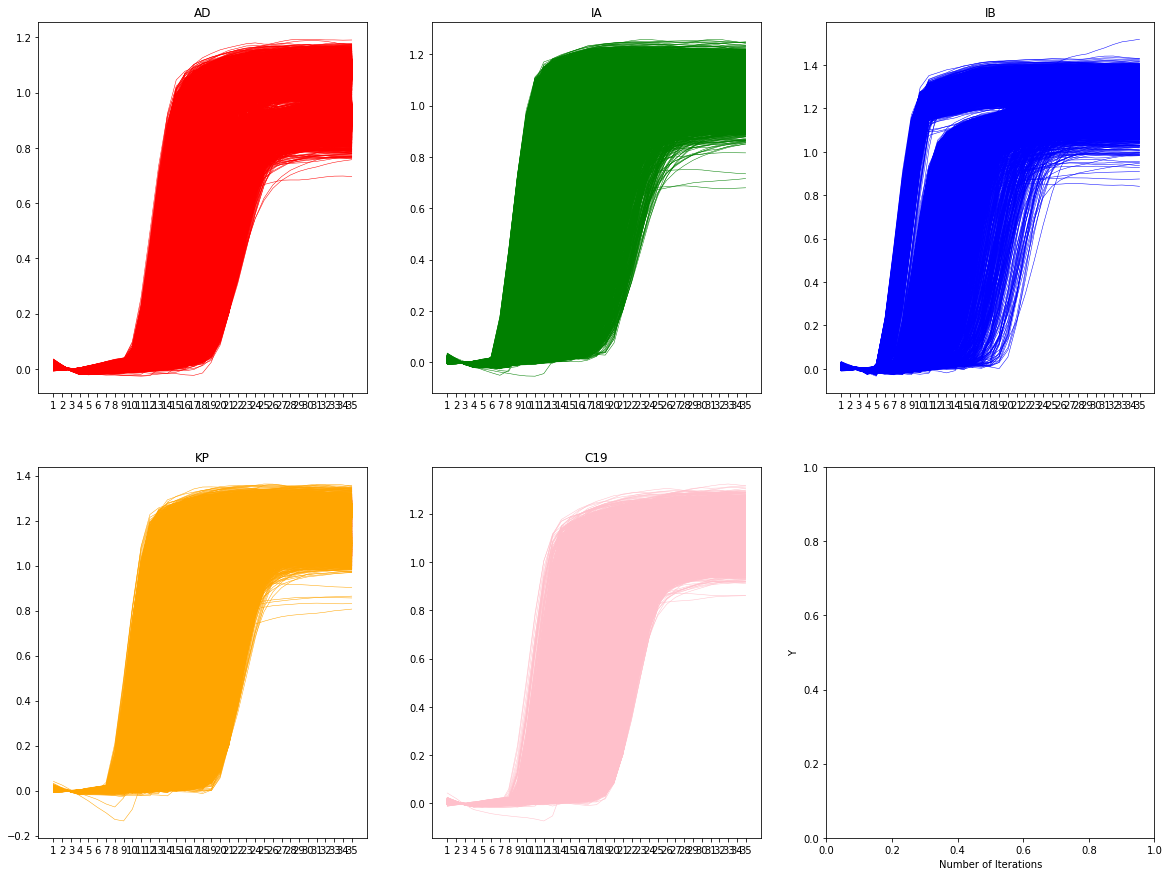

In [ ]:
f, axs = plt.subplots(2,3)

#set axis label
plt.xlabel('Number of Iterations')
plt.ylabel('Y')

#set figure size
f.set_figwidth(20)
f.set_figheight(15)

#for all values use line below
axs[0, 0].set_title('AD')
for i in ad_only.columns:
  axs[0,0].plot(ad_only[i],color='red', linewidth=0.5)

#for all values use line below
axs[0, 1].set_title('IA')
for i in ia_only.columns:
  axs[0, 1].plot(ia_only[i],color='green', linewidth=0.5)

#for all values use line below
axs[0, 2].set_title('IB')
for i in ib_only.columns:
  axs[0, 2].plot(ib_only[i],color='blue', linewidth=0.5)

#for all values use line below
axs[1, 0].set_title('KP')
for i in kp_only.columns:
  axs[1, 0].plot(kp_only[i],color='orange', linewidth=0.5)

#for all values use line below
axs[1, 1].set_title('C19')
for i in c19_only.columns:
  axs[1, 1].plot(c19_only[i],color='pink', linewidth=0.5)

# #for all values use line below
# axs[1, 2].set_title('NTC')
# for i in ntc_only.columns:
#   axs[1, 2].plot(ntc_only[i])

plt.show()

## Simple ML Algorithms

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
sns.countplot(x = 'Target', data=df)


In [ ]:
class2idx = {
    'ad':0,
    'ia':1,
    'ib':2,
    'kp':3,
    'c19':4,
    'ntc':5
}

idx2class = {v: k for k, v in class2idx.items()}

df['Target'].replace(class2idx, inplace=True)

In [ ]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [ ]:
# Split into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=21)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
def get_class_distribution(obj):
    count_dict = {
        "ad": 0,
        "ia": 0,
        "ib": 0,
        "kp": 0,
        "c19": 0,
        "ntc": 0,
    }

    for i in obj:
        if i == 0:
            count_dict['ad'] += 1
        elif i == 1:
            count_dict['ia'] += 1
        elif i == 2:
            count_dict['ib'] += 1
        elif i == 3:
            count_dict['kp'] += 1
        elif i == 4:
            count_dict['c19'] += 1
        elif i == 5:
            count_dict['ntc'] += 1
        else:
            print("Check classes.")

    return count_dict

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')
# Validation
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_val)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Val Set')
# Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[2]).set_title('Class Distribution in Test Set')

In [ ]:
class ClassifierDataset(Dataset):

    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [ ]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)

target_list = torch.tensor(target_list)

In [ ]:
class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float)
print(class_weights)

In [ ]:
class_weights_all = class_weights[target_list]


In [ ]:
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

In [ ]:
EPOCHS = 300
BATCH_SIZE = 16
LEARNING_RATE = 0.0007
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 6

In [ ]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=weighted_sampler
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()

        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)

    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)

        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.layer_out(x)

        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

In [ ]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)

    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)

    acc = torch.round(acc * 100)

    return acc

In [ ]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [ ]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):

    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()

        y_train_pred = model(X_train_batch)

        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)

        train_loss.backward()
        optimizer.step()

        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()


    # VALIDATION
    with torch.no_grad():

        val_epoch_loss = 0
        val_epoch_acc = 0

        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)

            y_val_pred = model(X_val_batch)

            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)

            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))


    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')

In [ ]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')